# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import Levels
import Results
from RMatrix import PTBayes
import Resonances
from SpinGroups import SpinGroups

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Gathering Mean Parameters

In [3]:
eps = 0.005 # ...

A  = 181
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
FreqF = 1.0/6.0
Freq  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = SpinGroups.make(l, j)
MP2 = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

# 1 Spingroup Case:
SGs = SpinGroups.make(l[:1], j[:1])
MP1 = Resonances.MeanParameters(Freq=Freq[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], A=A, sg=SGs, EB=EB, FreqF=FreqF)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = MP2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = PTBayes(Res, MP1)
distributions = MP1.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP1.EB, Prior, TPPrior, distributions, MP1.FreqF)
Posterior_1, log_total_probability_1 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = PTBayes(Res, MP2)
distributions = MP2.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP2.EB, Prior, TPPrior, distributions, MP2.FreqF)
Posterior_2, log_total_probability_2 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00161
Average Error for False Probability = 0.00197



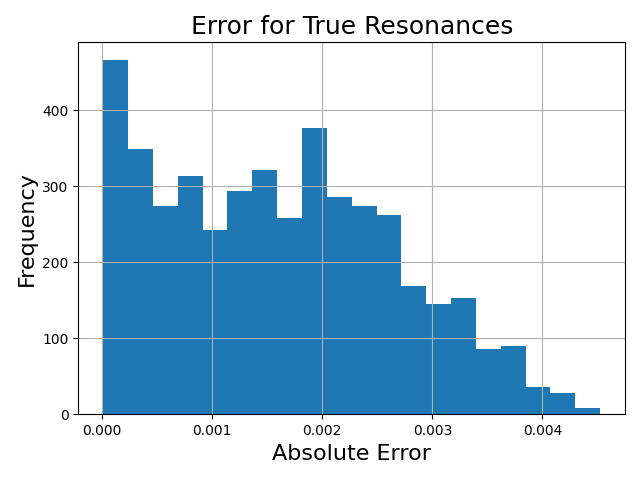

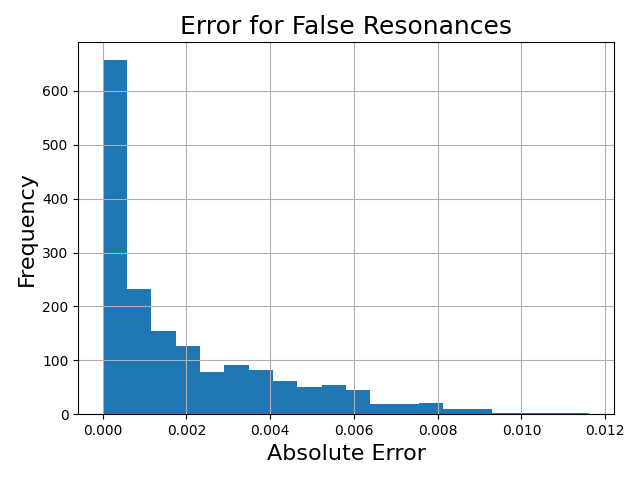

In [9]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [10]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.644193 0.642152]
 [0.746431 0.744974]
 [0.988269 0.988173]
 [0.96697  0.96672 ]
 [0.839047 0.83889 ]
 [0.910701 0.909779]
 [0.981097 0.981026]
 [0.977649 0.977439]
 [0.937295 0.936803]
 ...
 [0.892008 0.890861]
 [0.907556 0.906741]
 [0.74864  0.747629]
 [0.865802 0.864584]
 [0.71516  0.713757]
 [0.693449 0.692709]
 [0.666042 0.664163]
 [0.644648 0.644134]
 [0.901232 0.90017 ]]

False Spingroup Posterior:
[[0.355807 0.353655]
 [0.253569 0.252062]
 [0.011731 0.011674]
 [0.03303  0.032952]
 [0.160953 0.160242]
 [0.089299 0.089166]
 [0.018903 0.018812]
 [0.022351 0.022296]
 [0.062705 0.062514]
 ...
 [0.107992 0.107797]
 [0.092444 0.092211]
 [0.25136  0.250127]
 [0.134198 0.133798]
 [0.28484  0.283288]
 [0.306551 0.304659]
 [0.333958 0.331862]
 [0.355352 0.352601]
 [0.098768 0.098705]]
